<a href="https://colab.research.google.com/github/MUHAMMADFAWWAZWIYOGA/DIF2130_A_25_2311532019/blob/main/Pratikum3/BernouliNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB # Changed BernouliNB to BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # Changed skelearn to sklearn
from sklearn.metrics import confusion_matrix # Changed skelearn to sklearn

In [9]:
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

In [10]:
df = pd.DataFrame(dataset_dict)

In [11]:
df = pd.get_dummies(df, columns = ['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)
df.head()
df.head()

,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


In [19]:

df['Temperature'] = pd.cut(df['Temperature'], bins=[0, 80, 100], labels=['Warm', 'Hot'])
df['Humidity'] = pd.cut(df['Humidity'], bins=[0, 75, 100], labels=['Dry', 'Humid'])

one_hot_colloumns = pd.get_dummies(df[['Temperature','Humidity']], drop_first=True, dtype=int) #Fixed this line

df = df.drop(['Temperature', 'Humidity'], axis=1)
df = pd.concat([df, one_hot_colloumns], axis=1)
df.head()


,Wind,Play,overcast,rainy,sunny,Temperature_Hot,Humidity_Humid
0,0,0,0,0,1,1,1
1,1,0,0,0,1,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,0,0,1
4,0,1,0,1,0,0,1


In [21]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1GHYDXFOSdDNXeh4B-nwXgWzWJjulo78VqFiHr3dDYBc#gid=0


In [41]:
# prompt: latih data

# Split data into training and testing sets
X = df.drop('Play', axis=1)
y = df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=19)

# Initialize and train the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.5555555555555556
Confusion Matrix:
[[2 0]
 [4 3]]


📌 Hasil Prediksi:
   Wind  overcast  rainy  sunny  Temperature_Hot  Humidity_Humid  \
0     1         0      0      1                0               1   
1     0         0      1      0                0               0   

      Prediction  
0  Tidak Bermain  
1        Bermain  


<ipython-input-31-3a827e9cf8a4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=new_data_batch['Prediction'], palette='coolwarm')


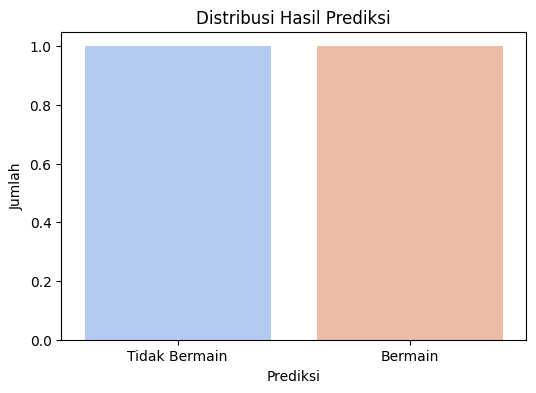

In [31]:
# Import library tambahan
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping hasil prediksi (0 = "Tidak Bermain", 1 = "Bermain")
label_mapping = {0: "Tidak Bermain", 1: "Bermain"}

# 1️⃣ **Prediksi untuk Data Baru**
new_data_batch = pd.DataFrame({
    'overcast': [0, 0],  # 0 jika bukan overcast
    'rainy': [0, 1],  # 1 jika rainy, 0 jika tidak
    'sunny': [1, 0],  # 1 jika sunny, 0 jika tidak
    'Wind': [1, 0],  # 1 jika strong, 0 jika weak
    'Temperature_Hot': [0, 0],  # 1 jika Hot, 0 jika tidak
    'Humidity_Humid': [1, 0]  # 1 jika Humid, 0 jika tidak
})

# Pastikan kolom sesuai dengan training data
feature_names = X_train.columns
new_data_batch = new_data_batch[feature_names]

# Lakukan prediksi
predictions = bnb.predict(new_data_batch)

# Konversi hasil prediksi dari angka ke teks
new_data_batch['Prediction'] = [label_mapping[p] for p in predictions]

# Tampilkan hasil dalam bentuk tabel
print("📌 Hasil Prediksi:")
print(new_data_batch)

# 2️⃣ **Visualisasi Hasil Prediksi**
plt.figure(figsize=(6,4))
sns.countplot(x=new_data_batch['Prediction'], palette='coolwarm')
plt.title("Distribusi Hasil Prediksi")
plt.xlabel("Prediksi")
plt.ylabel("Jumlah")
plt.show()


In [32]:
# Fungsi untuk menerima input dan melakukan prediksi
def predict_custom_data():
    print("\n🔹 Masukkan data untuk prediksi:")

    overcast = int(input("Overcast (1=Ya, 0=Tidak): "))
    rainy = int(input("Rainy (1=Ya, 0=Tidak): "))
    sunny = int(input("Sunny (1=Ya, 0=Tidak): "))
    wind = int(input("Wind (1=Strong, 0=Weak): "))
    temp_hot = int(input("Temperature Hot (1=Ya, 0=Tidak): "))
    humidity_humid = int(input("Humidity Humid (1=Ya, 0=Tidak): "))

    # Buat DataFrame dari input user
    input_data = pd.DataFrame([[overcast, rainy, sunny, wind, temp_hot, humidity_humid]],
                              columns=feature_names)

    # Lakukan prediksi
    prediction = bnb.predict(input_data)[0]
    predicted_label = label_mapping[prediction]

    # Tampilkan hasil
    print(f"\n📢 Hasil Prediksi: {predicted_label}")

# Jalankan fungsi untuk input manual
predict_custom_data()



🔹 Masukkan data untuk prediksi:
Overcast (1=Ya, 0=Tidak): 1
Rainy (1=Ya, 0=Tidak): 1
Sunny (1=Ya, 0=Tidak): 1
Wind (1=Strong, 0=Weak): 1
Temperature Hot (1=Ya, 0=Tidak): 1
Humidity Humid (1=Ya, 0=Tidak): 1

📢 Hasil Prediksi: Bermain
